# Завдання

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [ ]:
import pandas as pd
import urllib.parse

url = "https://uk.wikipedia.org/wiki/Населення_України"
quoted_url = urllib.parse.quote(url, safe='/:')

tables = pd.read_html(quoted_url, attrs={"class": "wikitable collapsible collapsed"})
table = tables[3]
title = 'Коефіцієнт народжуваності в регіонах України (1950—2019)'
print(title)
print(table)


Коефіцієнт народжуваності в регіонах України (1950—2019)
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівськ

1.Вивести перші рядки таблиці за допомогою методу head


In [ ]:
print(table.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


2.Визначте кількість рядків та стовпців у датафреймі (атрибут shape)


In [ ]:
print(table.shape)

(28, 9)


3.Замініть у таблиці значення "—" на значення NaN


In [ ]:
table_NA = table.replace('—', pd.NA)
print(table_NA)

               Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0                Крим  230.0  206.0  160.0   130    73   126  <NA>  <NA>
1           Вінницька  224.0  192.0  142.0   124    84   112   109    76
2           Волинська  247.0  250.0  179.0   153   112   148   141   101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4            Донецька  271.0  214.0  140.0   109    61    98    82  <NA>
5         Житомирська  261.0  223.0  159.0   129    89   122   120    79
6        Закарпатська  314.0  273.0  207.0   168   115   151   146   104
7          Запорізька  219.0  197.0  150.0   124    71   106   106    68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124   122    88
9            Київська  204.0  189.0  156.0   123    73   122   121    80
10     Кіровоградська  216.0  171.0  145.0   126    79   110   108    68
11          Луганська  262.0  235.0  144.0   116    62    96    51  <NA>
12          Львівська  234.0  240.0  171.0   140   

4.Визначте типи всіх стовпців за допомогою dataframe.dtypes


In [ ]:
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


5.Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"


In [ ]:
table_NA['2014'] = pd.to_numeric(table_NA['2014'], errors='coerce')
table_NA['2019'] = pd.to_numeric(table_NA['2019'], errors='coerce')
print(table_NA.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


6.Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [ ]:
null_counts = table_NA.isnull().sum()
print(null_counts)

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


7.Видаліть з таблиці дані по всій країні, останній рядок таблиці


In [ ]:
import pandas as pd

table_cutten = table_NA.drop(table_NA.index[-1])
print(table_cutten)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

8.Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)


In [ ]:
mean_table = table_cutten

for column in mean_table.columns:
  if mean_table[column].dtype != 'object':
    mean_table[column] = mean_table[column].fillna(mean_table[column].mean())

print(mean_table)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

9.Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні


In [ ]:
mean_value = mean_table['2019'].mean()
higher_than_mean = mean_table[mean_table['2019'] > mean_value]['Регіон']
print(higher_than_mean)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


10.У якому регіоні була найвища народжуваність у 2014 році?


In [ ]:
max_value = mean_table['2014'].max()
max_region = mean_table[mean_table['2014'] == max_value]['Регіон']
print(max_region)

16    Рівненська
Name: Регіон, dtype: object


11.Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

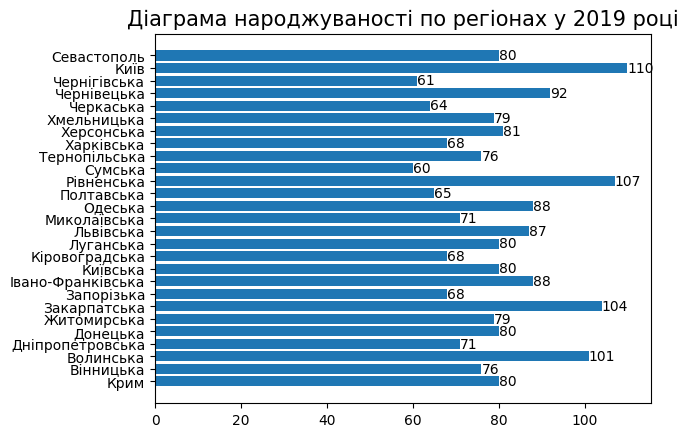

In [ ]:
import matplotlib.pyplot as plt

plt.barh(mean_table['Регіон'], mean_table['2019'])
plt.title("Діаграма народжуваності по регіонах у 2019 році", fontsize=15)
for index, value in enumerate(mean_table['2019']):
    plt.text(value, index, str(int(value)), va='center')

# Візуалізація

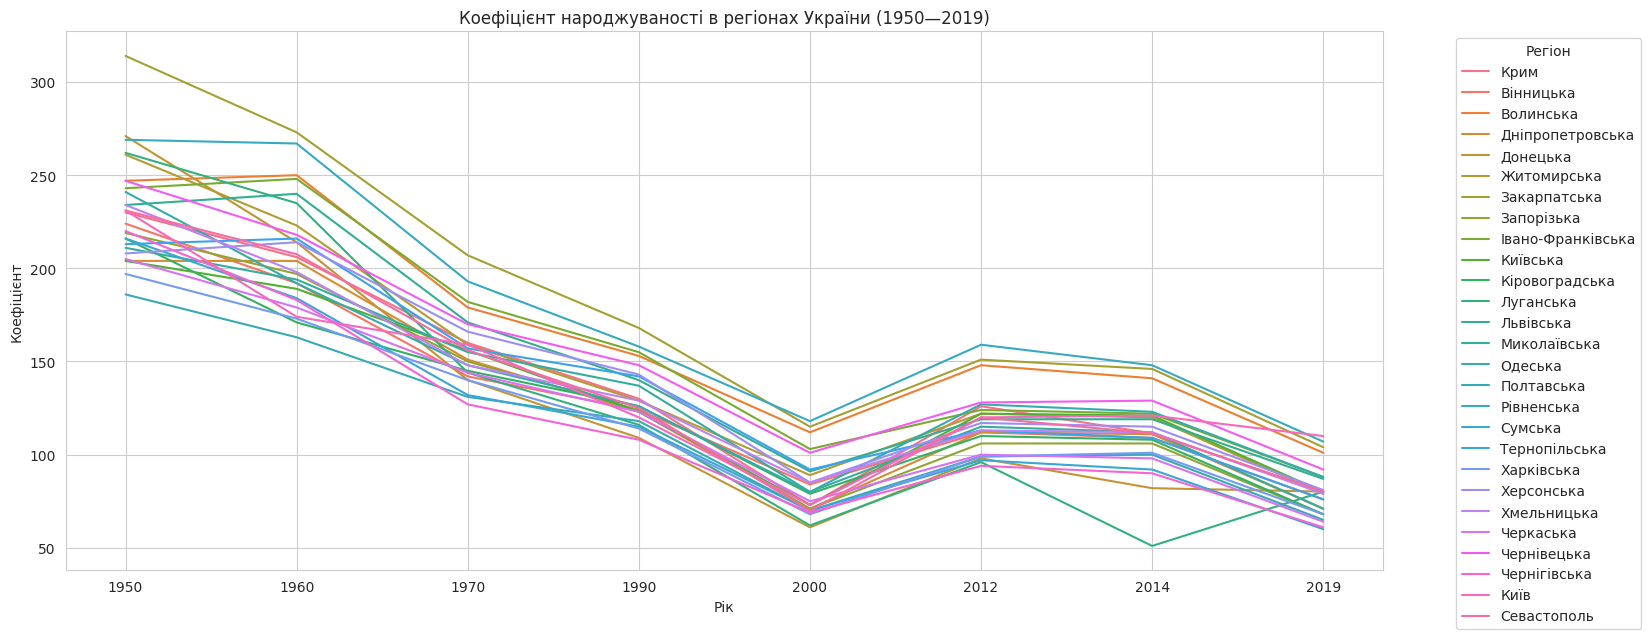

In [ ]:
import seaborn as sns

df_long = mean_table.melt(id_vars=["Регіон"], var_name="Рік", value_name="Коефіцієнт")

sns.set_style("whitegrid")
plt.figure(figsize=(17, 7))
sns.lineplot(x="Рік", y="Коефіцієнт", hue="Регіон", data=df_long)

plt.title("Коефіцієнт народжуваності в регіонах України (1950—2019)")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт")

plt.legend(title="Регіон", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

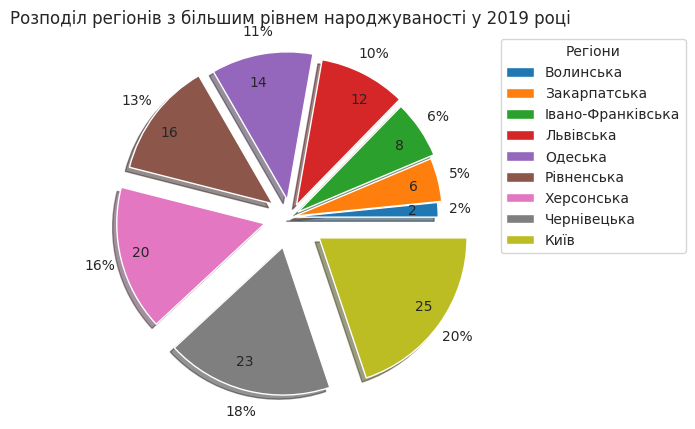

In [ ]:
import seaborn as sns

data = higher_than_mean.index
labels = higher_than_mean.index.to_list()
explode=[]
i = 0.0
for _ in labels:
    explode.append(i)
    i += 0.03

plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.f%%",
    pctdistance=1.15,
    labeldistance=0.8,
)

plt.legend(
    labels=higher_than_mean.tolist(),
    title="Регіони",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.title("Розподіл регіонів з більшим рівнем народжуваності у 2019 році")
plt.show()

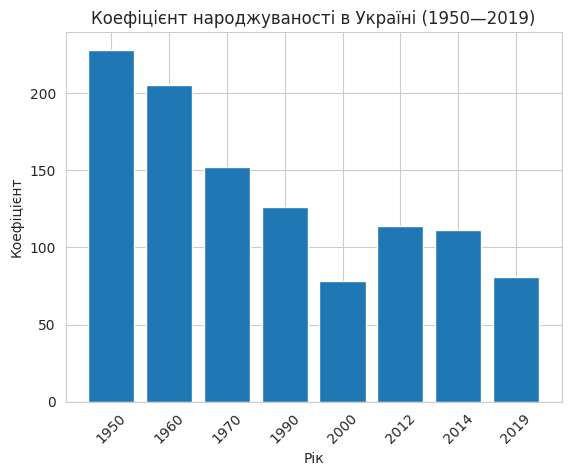

In [ ]:
last_row = table_NA.iloc[-1]

years = table_NA.columns[1:]
values = last_row[1:]

plt.bar(years, values)

plt.title('Коефіцієнт народжуваності в Україні (1950—2019)')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт')

plt.xticks(rotation=45)
plt.show()